# Analysing the climate change in various part of the globe.

Welcome to the kernel for analysing the climate change on variuos parts of the globe.

# Importing the modules and data

Importing the required packages.

In [1]:
%matplotlib inline

import os, random
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.animation as anim
# import seaborn as sns
from subprocess import check_output

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

plt.rcParams["figure.figsize"] = (12,10)

Checking the files present in the input folder.

In [2]:
print(check_output(["ls", "Input"]).decode("utf8"))

GlobalLandTemperaturesByCity.csv
GlobalLandTemperaturesByCountry.csv
GlobalLandTemperaturesByMajorCity.csv
GlobalLandTemperaturesByState.csv
GlobalTemperatures.csv



Loading the data and checking the empty values in the data.

In [3]:
gt=pd.read_csv('Input/GlobalTemperatures.csv')
print(gt.shape)
print(gt.isnull().sum())

(3192, 9)
dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


In [4]:
countries=pd.read_csv('Input/GlobalLandTemperaturesByCountry.csv')
print(countries.shape)
print(countries.isnull().sum())

(577462, 4)
dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64


In [5]:
major_cities=pd.read_csv('Input/GlobalLandTemperaturesByMajorCity.csv')
print(major_cities.shape)
print(major_cities.isnull().sum())

(239177, 7)
dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64


So we have some empty values in the data provided. The major thing is that all *.csv* contains dt as a column. But we cannot do much of the things when all date, month and year are together, so we need to split month and year, leaving the date which is not of much importance.

# Exploration of the data

## Cleaning the data

Splitting the *dt* column of type string in every table to year, month and day.

In [6]:
# Cleaning global temperatures
gt['DateTime']=pd.to_datetime(gt['dt'])
gt=gt.drop('dt', 1)
gt['Year']=gt['DateTime'].dt.year
gt['Month']=gt['DateTime'].dt.month
gt['Day']=gt['DateTime'].dt.day
gt=gt.drop('DateTime', 1)

# Cleaning country temperatures
countries['DateTime']=pd.to_datetime(countries['dt'])
countries=countries.drop('dt', 1)
countries['Year']=countries['DateTime'].dt.year
countries['Month']=countries['DateTime'].dt.month
countries['Day']=countries['DateTime'].dt.day
countries=countries.drop('DateTime', 1)

# Cleaning major city temperatures
major_cities['DateTime']=pd.to_datetime(major_cities['dt'])
major_cities=major_cities.drop('dt', 1)
major_cities['Year']=major_cities['DateTime'].dt.year
major_cities['Month']=major_cities['DateTime'].dt.month
major_cities['Day']=major_cities['DateTime'].dt.day
major_cities=major_cities.drop('DateTime', 1)

## Doing some basic analysis

### Analysis on average land temperatures globally

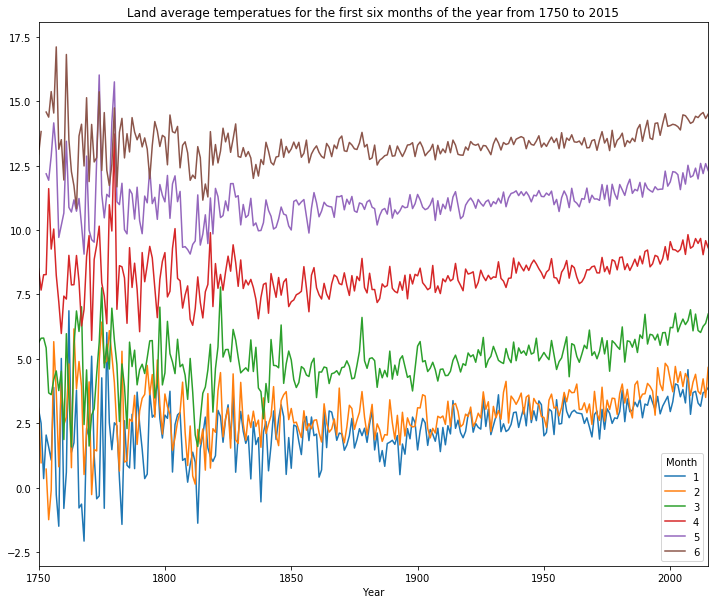

In [7]:
gt[gt['Month'].isin([1,2,3,4,5,6])].pivot_table(index='Year', columns='Month', values='LandAverageTemperature', aggfunc=sum).plot()
plt.title('Land average temperatues for the first six months of the year from 1750 to 2015')

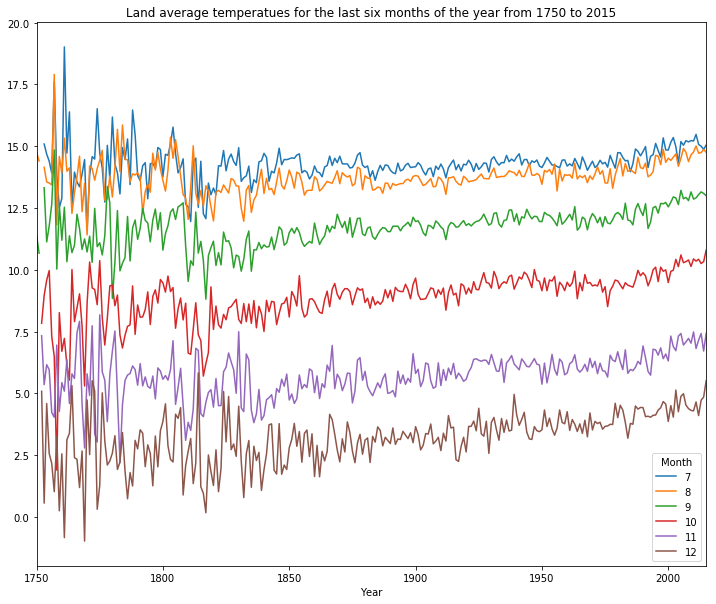

In [8]:
gt[gt['Month'].isin([7,8,9,10,11,12])].pivot_table(index='Year', columns='Month', values='LandAverageTemperature', aggfunc=sum).plot()
plt.title('Land average temperatues for the last six months of the year from 1750 to 2015')

As we can see from the above two graphs before 1850, the change in temperatures of the same month between successive years vary drastically.
But after 1850, the change in temperatures of the same month between successive years are quite constant.
After 1950, the change in temperature of the same month between successive years have narrowed down and hence can be easily predicted.

And if you see carefully, the average land temperatures are increasing in the first six months and decreasing in the last six months. The change in the temperatures in (Jan, Feb) and (Jun, July) is quite small.

Constant increase in temperatures from Feb to Jun, and a constant decrease in temperatures from July to Dec.

Another important thing is that the land average temperature is slowly increasing compared to previous years. And the increase has been significant over last 30 years.

### Mapping average temperatures of countries

In [9]:
countries = countries.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

mean_temp = []
for country in countries['Country'].unique():
    mean_temp.append(countries[(countries['Country']==country) & (countries['Year']==2013)]['AverageTemperature'].mean())
    
data = [ dict(
        type = 'choropleth',
        locations = countries['Country'].unique(),
        z = mean_temp,
        locationmode = 'country names',
        text = countries['Country'].unique(),
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries in 2013 in orthographic mode',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(224,239,253)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
#         lonaxis =  dict(
#                 showgrid = True,
#                 gridcolor = 'rgb(102, 102, 102)'
#             ),
#         lataxis = dict(
#                 showgrid = True,
#                 gridcolor = 'rgb(102, 102, 102)'
#                 )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='d3-world-map')

*If the image is not visible install plotly and try again.*

In [10]:
layout = dict(
    title = 'Average land temperature in countries in 2013',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(224,239,253)',
#         projection = dict(
#         type = 'orthographic',
#             rotation = dict(
#                     lon = 60,
#                     lat = 10),
#         ),

            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='d3-world-map')

Map shows a average land temperatures of various countries in 2013 both in orthographic mode and in linear mode.

*If the image is not visible install plotly and try again.*

### Top 20 hottest countries

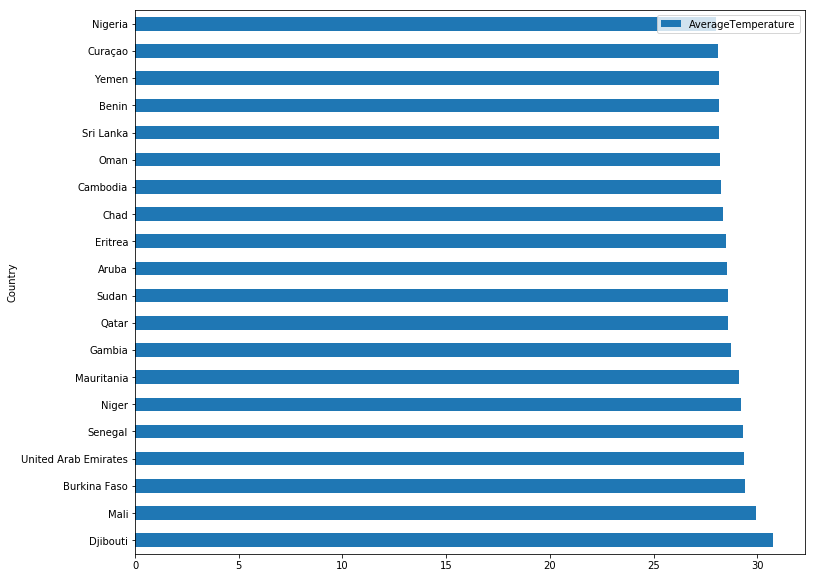

In [11]:
df=pd.DataFrame({'Country': countries['Country'].unique(), 'AverageTemperature': mean_temp})
df.sort_values('AverageTemperature', ascending=False).head(20).plot(kind='barh', x='Country', y='AverageTemperature')

### Top 20 coldes countries

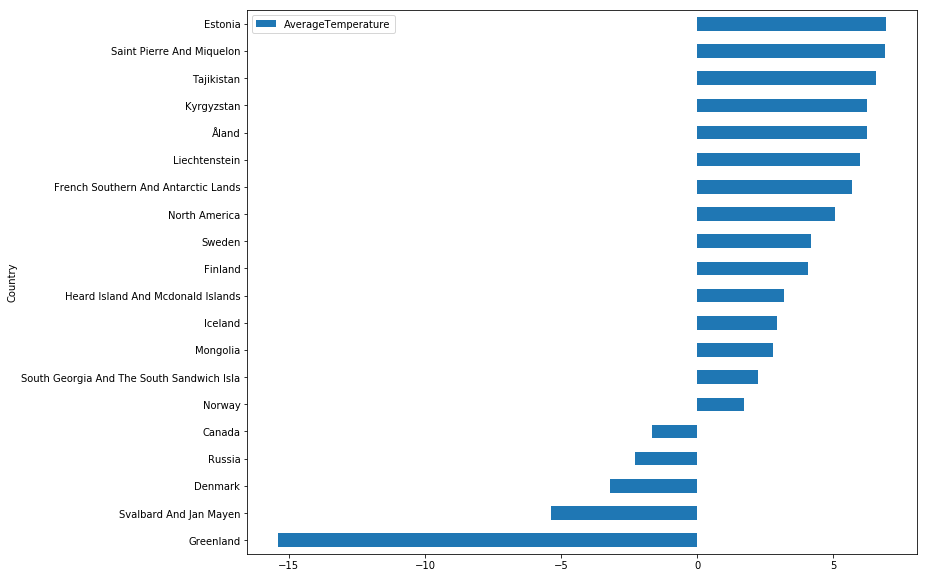

In [12]:
df.sort_values('AverageTemperature').head(20).plot(kind='barh', x='Country', y='AverageTemperature')

### Analysis of temperatures in metro cities of India

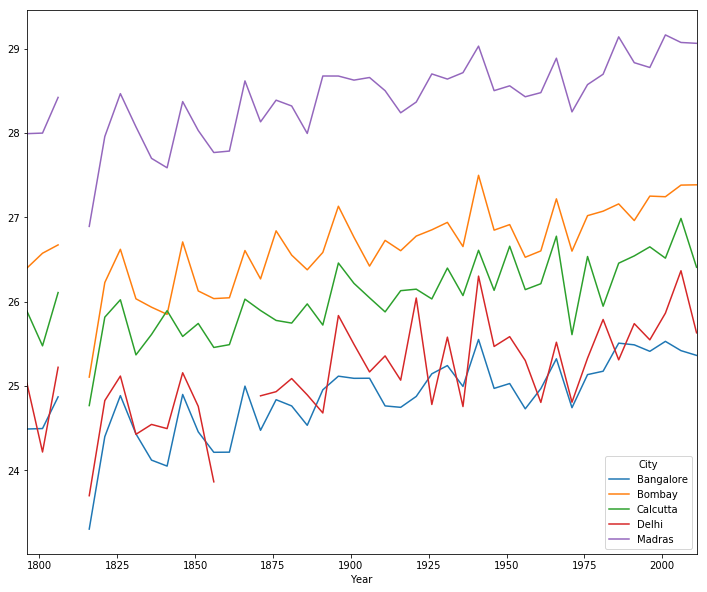

In [13]:
metro_cities=major_cities[major_cities['City'].isin(['Bangalore', 'Bombay', 'Calcutta', 'Delhi', 'Madras'])]
sampled_years=metro_cities['Year'].unique()[::5]
metro_cities[metro_cities['Year'].isin(sampled_years)].pivot_table(index='Year', columns="City", values='AverageTemperature').plot()

Therefore *Bangalore* has the lowest temperatures and *Madras* has the highest temperatues among the metro cities in India.

# The results

We can clearly see that over the last 30 years, temperatures around the world are rapidly increasing. **Global warming is definitely happening. Don't take mother earth as granted. Take care of earth, earth will take care of your childern. Save our planet for our children's children.**